In [487]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [488]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [489]:
df.shape

(299, 13)

In [490]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [491]:
# df = df.drop("time",axis=1)

In [492]:
df.isnull().values.any()   #checking for null values currently our dataset does not have any null values

False

In [493]:
## If there were any null values we can replace the null values with either mean or median of the coloumn
## For instance if "age" coloumn is having a null value we can follow the procedure as,
# m = df['Age'].mean()
# df['age'].fillna(value=m,inplace=True)

In [494]:
# smote for balancing dataset
from imblearn.over_sampling import SMOTE
target = df["DEATH_EVENT"]
input = df.drop("DEATH_EVENT", axis=1)
sm  = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res= sm.fit_resample(input,target)
smoted_df = pd.concat([X_res,y_res], axis=1)
print(len(smoted_df))


406


In [495]:
smoted_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [496]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(input,target,test_size=0.2,random_state=42)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))
count,unique = np.unique(y_res,return_counts=True)
print(count,unique)

239 239
60 60
[0 1] [203 203]


In [497]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50,criterion='entropy',max_features=8)
etc.fit(X_res,y_res)
#print(etc.score(X_test,y_test))
feature_imp = etc.feature_importances_
#feature_imp_norm = np.std([tree.feature_importances_ for tree in etc.estimators_],axis=0)
print(feature_imp*100)

[ 8.0995354   3.18437101  5.31206364  3.14807328 13.31889002  3.51175528
  5.33689572 11.37699048  5.89483137  3.74192447  3.30860668 33.76606266]


In [498]:
from sklearn.ensemble import RandomForestClassifier   
selector = RandomForestClassifier(n_estimators=100)
selector.fit(X_res, y_res)
feature_importances = selector.feature_importances_
feature_imp_norm = np.std([tree.feature_importances_ for tree in etc.estimators_],axis=0)
print(feature_importances*100)


[ 9.88906785  1.24147735  7.40431964  1.36191372 13.70508228  0.96208051
  6.71488302 18.20948729  6.75482586  1.72267675  1.26582908 30.76835665]


In [499]:
smoted_df.drop(columns=['anaemia'], inplace=True)
smoted_df.drop(columns=['diabetes'], inplace=True)
smoted_df.drop(columns=['high_blood_pressure'], inplace=True)
smoted_df.drop(columns=['sex'], inplace=True)
smoted_df.drop(columns=['smoking'], inplace=True)

In [500]:
smoted_df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,582,20,265000.00,1.9,130,4,1
1,55.0,7861,38,263358.03,1.1,136,6,1
2,65.0,146,20,162000.00,1.3,129,7,1
3,50.0,111,20,210000.00,1.9,137,7,1
4,65.0,160,20,327000.00,2.7,116,8,1


In [501]:
# From ETC feature selection we got to know that ejection_fraction,serum_creatinine,and time are important features.
df[smoted_df.DEATH_EVENT==0]

C:\Users\modug\AppData\Local\Temp\ipykernel_19324\1349946138.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[smoted_df.DEATH_EVENT==0]


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


In [502]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_res_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_res_pred)
print(accuracy)

0.8


In [503]:
## removing outliers using quantile 

max_thresold_eje = smoted_df["ejection_fraction"].quantile(0.95)
min_thresold_eje = smoted_df["ejection_fraction"].quantile(0.01)
print("max ejection_fraction:",max_thresold_eje,"min ejection_fraction:",min_thresold_eje)


max ejection_fraction: 60.0 min ejection_fraction: 16.05


In [504]:
len(smoted_df[smoted_df["ejection_fraction"]>max_thresold_eje])
len(smoted_df[smoted_df["ejection_fraction"]<min_thresold_eje])
print("Total outliers using Quantile method:",len(smoted_df[(smoted_df.ejection_fraction<min_thresold_eje) | (smoted_df.ejection_fraction>max_thresold_eje)]))

Total outliers using Quantile method: 11


In [505]:

df1 = smoted_df[(smoted_df.ejection_fraction>=min_thresold_eje) & (smoted_df.ejection_fraction<=max_thresold_eje)]
len(df1)

395

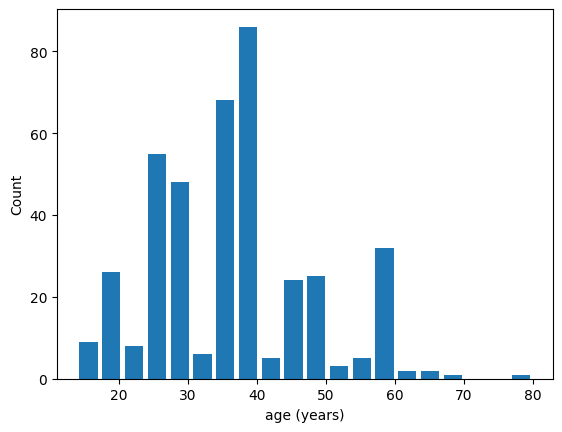

In [506]:
plt.hist(smoted_df.ejection_fraction, bins=20, rwidth=0.8)
plt.xlabel('age (years)')
plt.ylabel('Count')
plt.show()

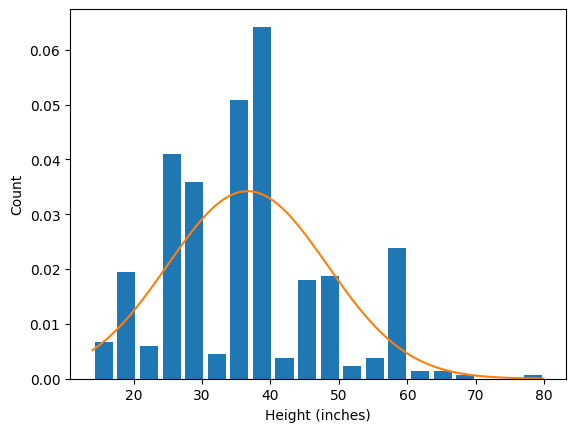

In [507]:
from scipy.stats import norm
import numpy as np
plt.hist(smoted_df.ejection_fraction, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(smoted_df.ejection_fraction.min(), smoted_df.ejection_fraction.max(), 0.1)
plt.plot(rng, norm.pdf(rng,smoted_df.ejection_fraction.mean(),smoted_df.ejection_fraction.std()))

In [508]:
## Bell shaped curve is not formed clearly so data is not normally distributed so zscore cannot be applied

<AxesSubplot: ylabel='age'>

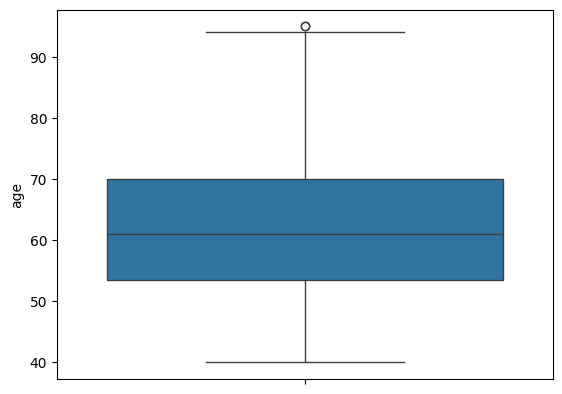

In [509]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(smoted_df["age"])

In [510]:
from scipy.stats.mstats import winsorize
lower_percentile = 0.10
upper_percentile = 0.90
lower_limit = smoted_df["creatinine_phosphokinase"].quantile(lower_percentile)
upper_limit = smoted_df["creatinine_phosphokinase"].quantile(upper_percentile)
smoted_df["creatinine_phosphokinase"] = winsorize(smoted_df["creatinine_phosphokinase"], limits=(lower_percentile, 1-upper_percentile))

outlier_removed = sum((smoted_df["creatinine_phosphokinase"]<lower_limit) | (smoted_df["creatinine_phosphokinase"]>upper_limit))
print("No of outliers in creatinine_phosphokinase using winsorization:",outlier_removed)
print(lower_limit,upper_limit)
print(len(smoted_df["creatinine_phosphokinase"]))

No of outliers in creatinine_phosphokinase using winsorization: 82
71.5 1271.0
406


<AxesSubplot: ylabel='creatinine_phosphokinase'>

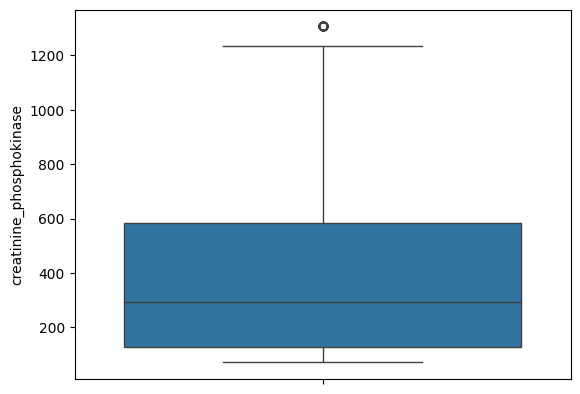

In [511]:
sns.boxplot(smoted_df["creatinine_phosphokinase"])

In [512]:
from scipy.stats.mstats import winsorize
lower_percentile = 0.1
upper_percentile = 0.90
lower_limit = smoted_df["ejection_fraction"].quantile(lower_percentile)
upper_limit = smoted_df["ejection_fraction"].quantile(upper_percentile)
smoted_df["ejection_fraction"] = winsorize(smoted_df["ejection_fraction"], limits=(lower_percentile, 1-upper_percentile))

outlier_removed = sum((smoted_df["ejection_fraction"]<lower_limit) | (smoted_df["ejection_fraction"]>upper_limit))
print("No of outliers in ejection_fraction using winsorization:",outlier_removed)
print(lower_limit,upper_limit)
print(len(smoted_df["ejection_fraction"]))

No of outliers in ejection_fraction using winsorization: 0
23.0 55.0
406


<AxesSubplot: ylabel='ejection_fraction'>

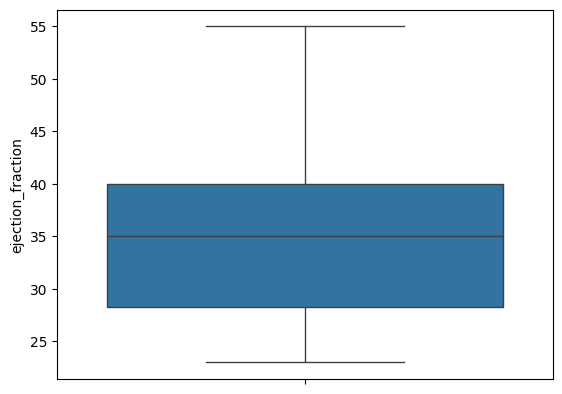

In [513]:
sns.boxplot(smoted_df["ejection_fraction"])

In [514]:
from scipy.stats.mstats import winsorize
lower_percentile = 0.03
upper_percentile = 0.97
lower_limit = smoted_df["platelets"].quantile(lower_percentile)
upper_limit = smoted_df["platelets"].quantile(upper_percentile)
smoted_df["platelets"] = winsorize(smoted_df["platelets"], limits=(lower_percentile, 1-upper_percentile))

outlier_removed = sum((smoted_df["platelets"]<lower_limit) | (smoted_df["platelets"]>upper_limit))
print("No of outliers in platelets using winsorization:",outlier_removed)
print(lower_limit,upper_limit)
print(len(smoted_df["platelets"]))

No of outliers in platelets using winsorization: 26
107100.0 452792.69834518264
406


<AxesSubplot: ylabel='platelets'>

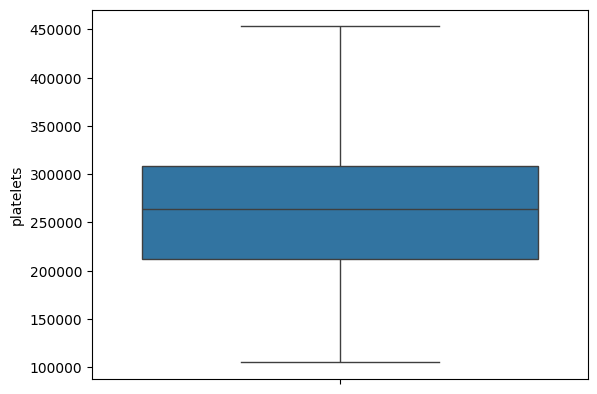

In [515]:
sns.boxplot(smoted_df["platelets"])

In [516]:
from scipy.stats.mstats import winsorize
lower_percentile = 0.075
upper_percentile = 0.925
lower_limit = smoted_df["serum_creatinine"].quantile(lower_percentile)
upper_limit = smoted_df["serum_creatinine"].quantile(upper_percentile)
smoted_df["serum_creatinine"] = winsorize(smoted_df["serum_creatinine"], limits=(lower_percentile, 1-upper_percentile))

outlier_removed = sum((smoted_df["serum_creatinine"]<lower_limit) | (smoted_df["serum_creatinine"]>upper_limit))
print("No of outliers in serum_creatinine using winsorization:",outlier_removed)
print(lower_limit,upper_limit)
print(len(smoted_df["serum_creatinine"]))

No of outliers in serum_creatinine using winsorization: 31
0.8 2.724666862423155
406


<AxesSubplot: ylabel='serum_creatinine'>

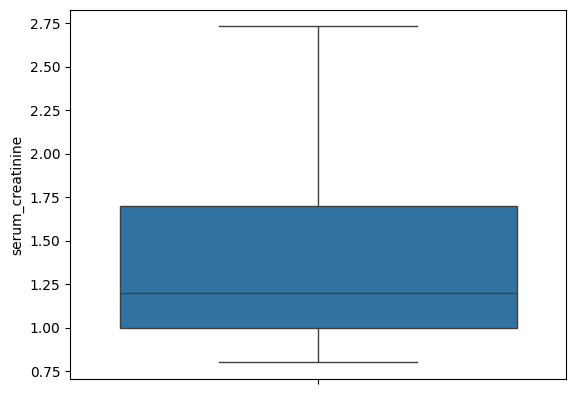

In [517]:
sns.boxplot(smoted_df["serum_creatinine"])

In [518]:
from scipy.stats.mstats import winsorize
lower_percentile = 0.03
upper_percentile = 0.97
lower_limit = smoted_df["serum_sodium"].quantile(lower_percentile)
upper_limit = smoted_df["serum_sodium"].quantile(upper_percentile)
smoted_df["serum_sodium"] = winsorize(smoted_df["serum_sodium"], limits=(lower_percentile, 1-upper_percentile))

outlier_removed = sum((smoted_df["serum_sodium"]<lower_limit) | (smoted_df["serum_sodium"]>upper_limit))
print("No of outliers in serum_sodium using winsorization:",outlier_removed)
print(lower_limit,upper_limit)
print(len(smoted_df["serum_sodium"]))

No of outliers in serum_sodium using winsorization: 0
127.0 144.0
406


<AxesSubplot: ylabel='serum_sodium'>

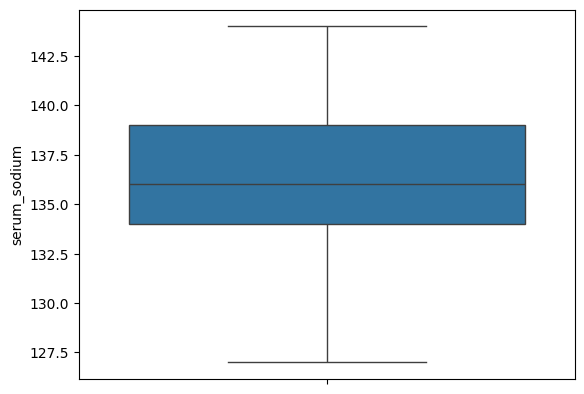

In [519]:
sns.boxplot(smoted_df["serum_sodium"])

In [520]:
# Q1 = smoted_df.ejection_fraction.quantile(0.25)
# Q3 = smoted_df.ejection_fraction.quantile(0.75)
# IQR = Q3 - Q1
# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# df_no_outlier = smoted_df[(smoted_df.ejection_fraction>=lower_limit)&(smoted_df.ejection_fraction<=upper_limit)]
# df_outlier = smoted_df[(smoted_df.ejection_fraction<lower_limit)|(smoted_df.ejection_fraction>upper_limit)]
# print("No of outliers using IQR for ejection fraction is:",len(df_outlier))
# print(lower_limit,upper_limit)
# len(df_no_outlier)

In [521]:
from sklearn.linear_model import LogisticRegression
target = smoted_df["DEATH_EVENT"]
input = smoted_df.drop(["DEATH_EVENT"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(input,target,test_size=0.2,random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_res_pred = logistic_model.predict(X_test)
logistic_model.score(X_test,y_test)

0.8048780487804879

In [522]:
smoted_df.to_csv('smoted_df.csv')

In [538]:
smoted_df.describe()

c:\Users\modug\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\modug\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\modug\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\modug\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\modug\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Us

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,62.399708,448.273399,36.433498,261688.677224,1.391707,136.330049,116.317734,0.500000
std,11.788080,393.236713,9.905442,80843.090821,0.577948,3.870679,76.205052,0.500617
min,40.000000,71.000000,23.000000,105000.000000,0.800000,127.000000,4.000000,0.000000
25%,53.438570,129.000000,28.250000,211572.711731,1.000000,134.000000,48.500000,0.000000
50%,61.000000,291.500000,35.000000,263358.030000,1.197733,136.000000,104.500000,0.500000
75%,70.000000,582.000000,40.000000,308750.000000,1.700000,139.000000,186.000000,1.000000
max,95.000000,1307.000000,55.000000,453109.056877,2.731016,144.000000,285.000000,1.000000


In [523]:
# we can smell overfitting with cross validation
# Like if the accuracies of different folds are nearer to each other we can say model is robust and good
# If the accuracy values are different we can say there might be a chance of overfitting

In [524]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


param_grid_XG = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
XG_model = XGBClassifier(reg_alpha=0.1,reg_lambda=0.1)
scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(XG_model, param_grid_XG, scoring=scorer, cv=3)
grid_result = grid_search.fit(X_train, y_train)

best_model_XG = grid_result.best_estimator_
print(best_model_XG)
print(best_model_XG.subsample)

#KFold cross validation for constant accurarcy
num_folds = 10
kf = KFold(n_splits=num_folds)

cross_val_XG = cross_val_score(best_model_XG, X_train, y_train, cv=kf)
print(cross_val_XG)
print("cross val score of XGBoost:",cross_val_XG.mean())
y_pred = best_model_XG.predict(X_test)

test_accuracy = best_model_XG.score(X_test, y_test)
print('Test Accuracy of XGBoost Classifier:', test_accuracy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
0.9
[0.81818182 0.93939394 0.90909091 0.90909091 0.8125     0.90625
 0.875      0.875      0.9375     0.90625   ]
cross val score of XGBoost: 0.8888257575757577
Test Accuracy of XGBoost Classifier: 0.8780487804878049


In [525]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
  
param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
etc_model = ExtraTreesClassifier()
scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(etc_model, param_grid_et, scoring=scorer, cv=3)
grid_result = grid_search.fit(X_train, y_train)

best_model_et = grid_result.best_estimator_
print(best_model_et)
num_folds = 10
kf = KFold(n_splits=num_folds)

cross_val_etc = cross_val_score(best_model_et, X_train, y_train, cv=kf)
print(cross_val_etc)
print("cross val score of ETC:",cross_val_etc.mean())
y_pred = best_model_et.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of ETC: {accuracy}')

In [526]:
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

param_grid_gradient = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

gbc_model = GradientBoostingClassifier()

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(gbc_model, param_grid_gradient, scoring=scorer, cv=3)
grid_result = grid_search.fit(X_train, y_train)

best_model_gbc = grid_result.best_estimator_
print(best_model_gbc)
print(best_model_gbc.n_estimators_)
num_folds = 10
kf = KFold(n_splits=num_folds)

cross_val_gbc = cross_val_score(best_model_gbc, X_train, y_train, cv=kf)
print(cross_val_gbc)
print("cross val score of GBC:",cross_val_gbc.mean())
y_pred = best_model_gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of GBC : {accuracy}')


In [527]:
# Hyper Parameter tuning
# our dataset is completly numerical so there is no problem of apply hyperparameter tuning separatly for different features
# if we have categorical data we create a separate pipeline for that and another separate pipeline for numerical data and combine both of them and name it transformation pipeline and add algorithm at last called base estimator.
# after all these process we perform hyperparameter tuning

In [528]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt'],
}

rf_model = RandomForestClassifier()

scorer = make_scorer(accuracy_score)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring=scorer, cv=3)
grid_result_rf = grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_result_rf.best_estimator_
print(best_model_rf)
print(best_model_rf.min_samples_split)
print(best_model_rf.min_samples_leaf)
print(best_model_rf.max_features)


num_folds = 10
kf = KFold(n_splits=num_folds)

cross_val_rf = cross_val_score(best_model_rf, X_train, y_train, cv=kf)
print("Cross val score of Random Forest Classifier:", cross_val_rf.mean())

y_pred_rf = best_model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest Classifier: {accuracy_rf}')


In [530]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, make_scorer

# Define the parameter grid for hyperparameter tuning
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}


ann_model = MLPClassifier(max_iter=1000)


scorer = make_scorer(accuracy_score)


grid_search_ann = GridSearchCV(ann_model, param_grid_ann, scoring=scorer, cv=3)

grid_result_ann = grid_search_ann.fit(X_train, y_train)

best_model_ann = grid_result_ann.best_estimator_

accuracy_ann = best_model_ann.score(X_test, y_test)
print(f'Accuracy of ANN: {accuracy_ann}')


In [533]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


gb_model = GradientBoostingClassifier(n_estimators=150,learning_rate=0.1, max_depth=5, min_samples_leaf=2,
                           min_samples_split=10, subsample=0.6, random_state=42)
gb_model.fit(X_train, y_train)


xgb_model = XGBClassifier(n_estimators=150,
    learning_rate= 0.1,
    max_depth= 5,
    subsample=0.8,
    colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)


gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

hybrid_pred = (gb_pred + xgb_pred) / 2

# accuracy_hybrid = accuracy_score(y_test, hybrid_pred.round())
# print(f'Accuracy of Hybrid Model: {accuracy_hybrid}')
print(len(hybrid_pred))
print(len(y_test))
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Cross val score of Hybrid Model:", hybrid_accuracy)


In [534]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

estimate = [('rf', RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_split=10,min_samples_leaf=1,max_features= "sqrt",random_state=42)), ('xg', XGBClassifier(n_estimators=100,learning_rate= 0.1,max_depth= 5,subsample=0.8,colsample_bytree=0.8,random_state=42)), ('etc', ExtraTreesClassifier(max_depth=10, n_estimators=100))]

initial_weights = [1,1,1]

# param_grid = {
#     'weights': [[0.8,0.3,2.3],[0.7,0.3,2.2],[0.79,0.35,2.25],[0.8,0.29,2.35],[0.8,0.3,2.33]]
# }
param_grid = {
    'weights': [
        [w1, w2, w3]
        for w1 in [initial_weights[0] - 0.1, initial_weights[0], initial_weights[0] + 0.1]
        for w2 in [initial_weights[1] - 0.1, initial_weights[1], initial_weights[1] + 0.1]
        for w3 in [initial_weights[2] - 0.1, initial_weights[2], initial_weights[2] + 0.1]
    ]
}

voting_clf = VotingClassifier(estimators=estimate, voting='soft')

grid_search = GridSearchCV(voting_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best weights:", best_params['weights'])

voting_clf.fit(X_train, y_train)
percent_proba = voting_clf.predict_proba(X_train)
print(percent_proba[0][0])
num_folds = 10
kf = KFold(n_splits=num_folds)

cross_val_hybrid = cross_val_score(voting_clf, X_train, y_train, cv=kf)
print("Cross val score of hybrid Classifier:", cross_val_hybrid.mean())


Best weights: [1, 0.9, 1.1]
0.08588943154634604
Cross val score of hybrid Classifier: 0.8919507575757576


In [535]:
import pickle

In [536]:
# data = {"model": voting_clf, "Age": age, "Anaemia": anaemia,"CP":creatinine_phosphokinase,"Ejection_Fraction":ejection_fraction,"High_BP":high_blood_pressure,"Platelets":platelets,"Serum_Creatinine":serum_creatinine,"Serum_Sodium":serum_sodium, "Sex":sex, "Time":time	}
data = {"model": voting_clf}
with open('final_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [537]:
with open('final_model.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded =  data["model"]
y_res_pred = model_loaded.predict(X_test)
model_loaded.score(X_test,y_test)
# model_loaded.feature_names_in_